In [3]:
import numpy as np

df_training = open("mnist_train.csv")
df_testing = open("mnist_test.csv")

# ignore column names lines
df_testing.readline()
df_training.readline()

buffer = [[float(x) for x in line.split(',')] for line in df_training.readlines()]

training_labels = np.array([data[0] for data in buffer], dtype=np.int_)
training_features = np.array([data[1:] for data in buffer], dtype=np.double)
training_features /= 255

buffer = [[float(x) for x in line.split(',')] for line in df_testing.readlines()]

testing_labels = np.array([data[0] for data in buffer], dtype=np.double)
testing_features = np.array([data[1:] for data in buffer], dtype=np.double)
testing_features /= 255


In [6]:
class LogisticRegression:

    """ Forward Propagation """
    def forward_prop(self, x, w):
        return self.activation(np.matmul(x, w))
    
    """ sigmoid activation function"""
    def activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    """ MSE loss function (guess & label are np.arrays)"""
    def MSE_loss(self, guess, label, w):
        return (np.sum((np.square(np.subtract(guess, label)) / 2)) / len(label)) + np.sum(np.square(w))

    """ Returns the error rate, expressed as a percentage, of the given dataset """
    def error_rate(self, features, labels, w):

        if len(features) != len(labels):
            print("invalid data")
            return

        errors = 0.0
        y_hat = self.forward_prop(features, w)

        for i in range(len(labels)):
            guess = round(y_hat[i])
            if guess != labels[i]:
                errors += 1

        return errors / len(labels)

    
    #   Gradient Decent Implementation
    #   Features and Labels should be from the training set
    def fit(self, training_features, training_labels, max_epochs=100, learning_rate=.01, gamma=1):

        if len(training_features) != len(training_labels):
            print("invalid data")
            return
        
        # initialize weights
        d = len(training_features[0])
        w = np.random.normal(0.5, 0.2, size=(d,))

        for i in range(max_epochs):
            
            # every 10 epochs
            if i % 10 == 0:
                y = self.forward_prop(training_features, w)
                loss = self.MSE_loss(y, training_labels, w)
                print("Epoch:", i, "\tLoss:", loss)

                # learning rate step decay
                learning_rate *= .5

            # calculate prediction vector for entire dataset
            y_hat = self.forward_prop(training_features, w)

            # compute gradient with added weight constraints
            gradient = np.matmul(np.subtract(y_hat, training_labels), training_features) + gamma * w

            # weight update
            w -= learning_rate * gradient

        return w


In [9]:
model = LogisticRegression()

for d in range(10):
    new_testing_labels = np.array([int(x == d) for x in testing_labels], dtype=np.int_)
    new_training_labels = np.array([int(x == d) for x in training_labels], dtype=np.int_)

    weights = model.fit(training_features, new_training_labels, max_epochs=100, learning_rate=0.01, gamma=1)
    print("Digit:", d, "\tErorr Rate:", model.error_rate(testing_features, new_testing_labels, weights))
    print('\n')

    # save weight to file
    filename = "weights/w" + str(d) + "_result.bin"
    weights.tofile(filename)

Epoch: 0 	Loss: 229.7032070538504


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_52672\3644657493.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 10 	Loss: 806517.3928812993
Epoch: 20 	Loss: 717407.5842326864
Epoch: 30 	Loss: 678721.6297165947
Epoch: 40 	Loss: 660599.7890076165
Epoch: 50 	Loss: 651820.1037239862
Epoch: 60 	Loss: 647497.7090277749
Epoch: 70 	Loss: 645353.0483227444
Epoch: 80 	Loss: 644284.8073386591
Epoch: 90 	Loss: 643751.7048047981
Digit: 0 	Erorr Rate: 0.0212


Epoch: 0 	Loss: 224.15096232798453
Epoch: 10 	Loss: 1215292.7157337004
Epoch: 20 	Loss: 1120150.9323169836
Epoch: 30 	Loss: 1077474.5816416128
Epoch: 40 	Loss: 1056899.1454883667
Epoch: 50 	Loss: 1046785.6328058465
Epoch: 60 	Loss: 1041771.0889374343
Epoch: 70 	Loss: 1039274.2230882633
Epoch: 80 	Loss: 1038028.3674376165
Epoch: 90 	Loss: 1037406.0817055838
Digit: 1 	Erorr Rate: 0.0141


Epoch: 0 	Loss: 230.58961561651077
Epoch: 10 	Loss: 496626.7716275905
Epoch: 20 	Loss: 425328.0672530296
Epoch: 30 	Loss: 395580.45260106394
Epoch: 40 	Loss: 381769.14125124656
Epoch: 50 	Loss: 375096.7983041141
Epoch: 60 	Loss: 371815.4532272117
Epoch: 70 	Loss: 

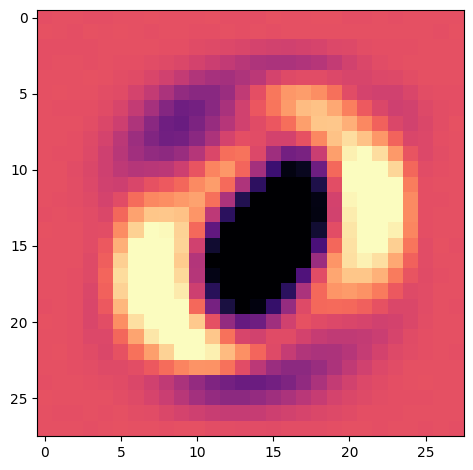

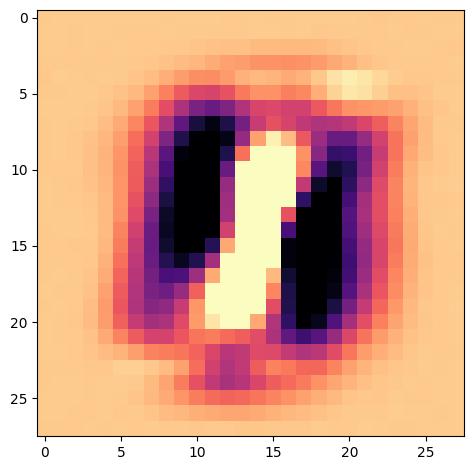

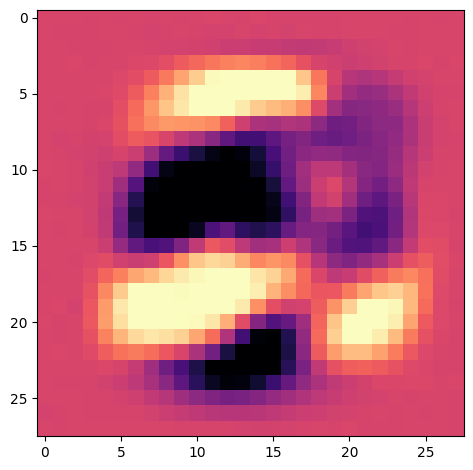

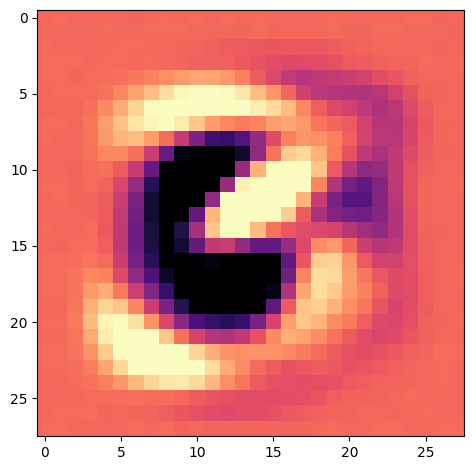

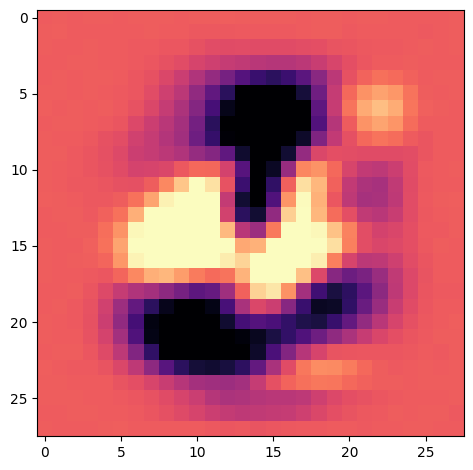

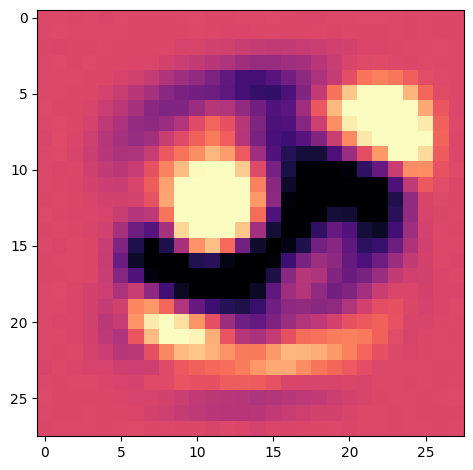

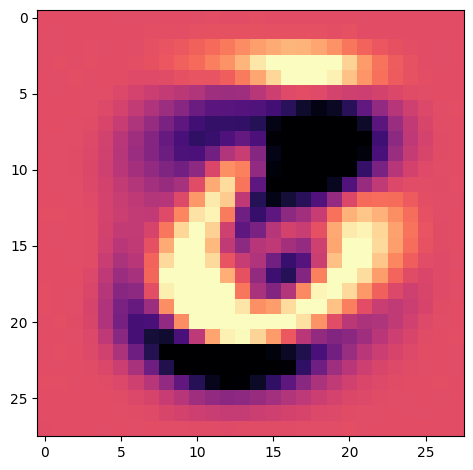

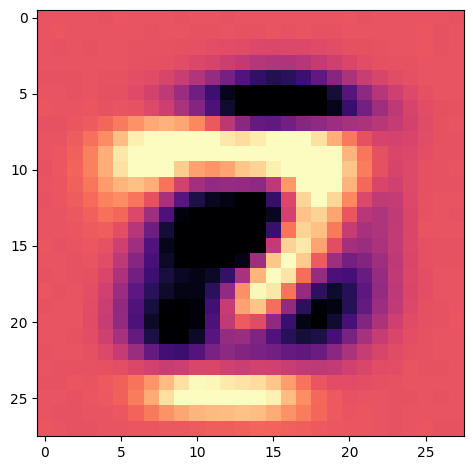

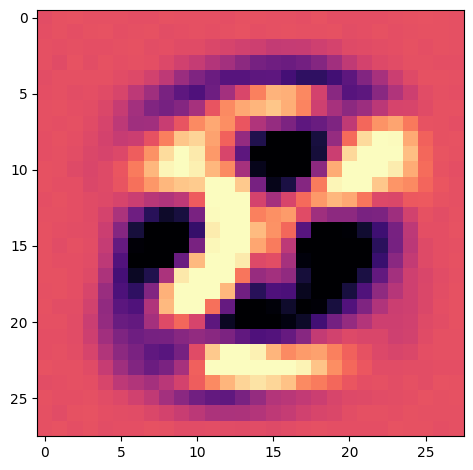

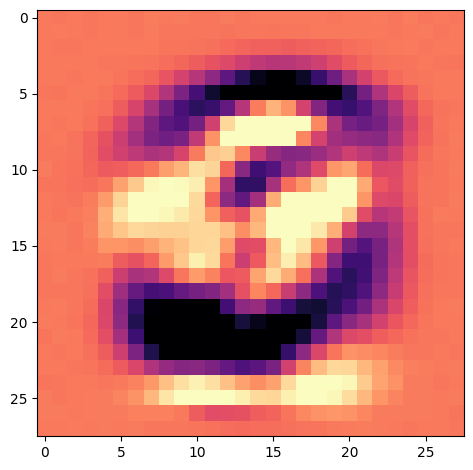

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#view results

for d in range(10):

    weights = np.fromfile("weights/w" + str(d) + "_test.bin")
    weights = np.reshape(weights, (28, 28))

    min = np.percentile(weights, 5)
    max = np.percentile(weights, 95)

    norm = mpl.colors.Normalize(vmin = min, vmax = max)

    fig, ax = plt.subplots()
    im = ax.imshow(weights, norm=norm, cmap='magma')

    plt.tight_layout()
    plt.show()